Import Libraries/Dataset 

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sns
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')
path = "/content/drive/My Drive/110_DL_Assignment_1/Problem_1/"

df_fake = pd.read_csv(path+"Fake.csv")
df_true = pd.read_csv(path+"True.csv")  

Mounted at /content/drive


Data Visualization

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fake=df_fake.drop(['subject','date'],axis=1)
df_true=df_true.drop(['subject','date'],axis=1)

In [6]:
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [7]:
df_true.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [8]:
df_fake.text.shape

(23481,)

In [9]:
df_true.text.shape

(21417,)

In [10]:
df_fake['label'] =1
df_true['label'] =0

In [11]:
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [12]:
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [13]:
data = pd.concat([df_true, df_fake], ignore_index=True)

In [14]:
data.shape

(44898, 3)

In [15]:
data =data.reindex(np.random.permutation(data.index))

In [16]:
data.head()

,title,text,label
22513,"White House Gives Up Trying To Control Trump,...","Ever since his presidential campaign, Donald T...",1
21368,Venezuela's injured activists struggle to heal,"CARACAS (Reuters) - Jesus Ibarra, a 19-year-ol...",0
30357,Republicans Are About To Bailout A Foreign Co...,Do you remember the time that Republicans thou...,1
14741,Swiss stop seizing income from asylum seekers ...,ZURICH (Reuters) - Switzerland will stop seizi...,0
43335,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",1


In [17]:
data.describe()

,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


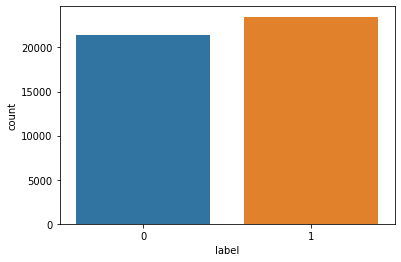

In [18]:
sns.countplot(data.label)

In [19]:
data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data[['title','text']], data.label,test_size=0.3, random_state=0)

In [21]:
x_train.shape

(31428, 2)

In [22]:
x_test.shape

(13470, 2)

Data Pre-processing

In [23]:
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")

embeddings_x_train =embed(x_train.title+x_train.text)
embeddings_x_test = embed(x_test.title+x_test.text)

Model Building

In [24]:
model = keras.Sequential()
model.add(keras.Input(shape=(128,)))
model.add(keras.layers.Dense(2, activation='relu', activity_regularizer=l2(0.0001)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4, activation='relu',activity_regularizer=l2(0.0001)))
model.add(keras.layers.Dense(8, activation='relu',activity_regularizer=l2(0.0001)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 258       
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


Model Compilation

In [25]:
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(learning_rate=0.01))

Model Training 

In [26]:
model_fit = model.fit(embeddings_x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
983/983 [==============================] - 2s 2ms/step - loss: 0.3877 - accuracy: 0.8283
Epoch 2/5
983/983 [==============================] - 2s 2ms/step - loss: 0.3567 - accuracy: 0.8500
Epoch 3/5
983/983 [==============================] - 2s 2ms/step - loss: 0.3556 - accuracy: 0.8506
Epoch 4/5
983/983 [==============================] - 2s 2ms/step - loss: 0.3555 - accuracy: 0.8494
Epoch 5/5
983/983 [==============================] - 2s 2ms/step - loss: 0.3516 - accuracy: 0.8526


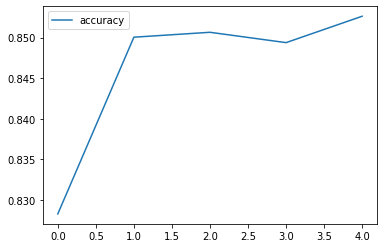

In [27]:
plt.plot(model_fit.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

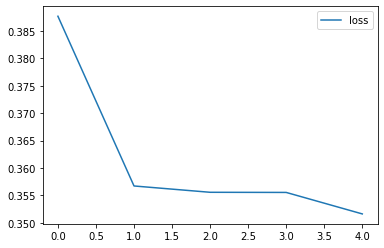

In [28]:
plt.plot(model_fit.history['loss'], label='loss')
plt.legend()
plt.show()

In [29]:
loss_and_metrics = model.evaluate(embeddings_x_test, y_test, batch_size=128)

106/106 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9758


Model Evaluation

In [30]:
y_pred = model.predict(embeddings_x_test)

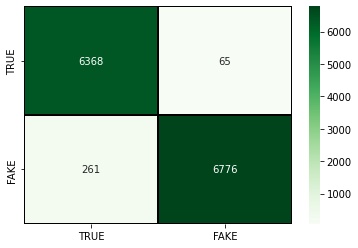

In [31]:
cm = confusion_matrix(y_test,y_pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
sns.heatmap(cm,cmap= "Greens", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])

Hyperparameter Tuning

1. Regularization: Train a model without regularization

In [32]:
model_without_reg = keras.Sequential()
model_without_reg.add(keras.Input(shape=(128,)))
model_without_reg.add(keras.layers.Dense(2, activation='relu'))
model_without_reg.add(keras.layers.Dropout(0.5))
model_without_reg.add(keras.layers.Dense(4, activation='relu'))
model_without_reg.add(keras.layers.Dense(8, activation='relu'))
model_without_reg.add(keras.layers.Dense(1, activation='sigmoid'))

model_without_reg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_without_reg.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [34]:
model_fit = model_without_reg.fit(embeddings_x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
983/983 [==============================] - 2s 2ms/step - loss: 0.4646 - accuracy: 0.7190
Epoch 2/5
983/983 [==============================] - 1s 1ms/step - loss: 0.3919 - accuracy: 0.7368
Epoch 3/5
983/983 [==============================] - 1s 1ms/step - loss: 0.3886 - accuracy: 0.7389
Epoch 4/5
983/983 [==============================] - 1s 1ms/step - loss: 0.3807 - accuracy: 0.7420
Epoch 5/5
983/983 [==============================] - 1s 1ms/step - loss: 0.3787 - accuracy: 0.7472


In [35]:
loss_and_metrics = model_without_reg.evaluate(embeddings_x_test, y_test, batch_size=128)

106/106 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9800


2. Dropout:Change the position and value of dropout layer

In [36]:
model_reg_pos = keras.Sequential()
model_reg_pos.add(keras.Input(shape=(128,)))
model_reg_pos.add(keras.layers.Dense(2, activation='relu'))
model_reg_pos.add(keras.layers.Dense(4, activation='relu'))
model_reg_pos.add(keras.layers.Dense(8, activation='relu'))
model_reg_pos.add(keras.layers.Dropout(0.65))
model_reg_pos.add(keras.layers.Dense(1, activation='sigmoid'))

model_reg_pos.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 8)                 40        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_reg_pos.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [38]:
model_fit = model_reg_pos.fit(embeddings_x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
983/983 [==============================] - 2s 1ms/step - loss: 0.3017 - accuracy: 0.8860
Epoch 2/5
983/983 [==============================] - 1s 1ms/step - loss: 0.2553 - accuracy: 0.9114
Epoch 3/5
983/983 [==============================] - 2s 2ms/step - loss: 0.2442 - accuracy: 0.9172
Epoch 4/5
983/983 [==============================] - 1s 1ms/step - loss: 0.2442 - accuracy: 0.9172
Epoch 5/5
983/983 [==============================] - 1s 1ms/step - loss: 0.2432 - accuracy: 0.9173


In [39]:
loss_and_metrics = model_reg_pos.evaluate(embeddings_x_test, y_test, batch_size=128)

106/106 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9808
